In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pylab as plt

from traffic.model import EnhancedModel

pd.options.mode.chained_assignment = None

In [2]:
TEST_DATA_DIR = os.path.join('../validation/data')
TRAIN_DATA_DIR = os.path.join('../src/traffic/data')

In [3]:
# generate model
nodes_df = pd.read_csv(os.path.join(TRAIN_DATA_DIR, 'road_network_nodes.csv'))
edges_df = pd.read_csv(os.path.join(TRAIN_DATA_DIR, 'road_network_edges.csv'))
trips_df = pd.read_csv(os.path.join(TRAIN_DATA_DIR, 'trips.csv'))

enhanced_model = EnhancedModel(node_data=nodes_df, edge_data=edges_df)
enhanced_model.add_trips(trip_data=trips_df)

In [4]:
# test model
test_df = pd.read_csv(os.path.join(TEST_DATA_DIR, 'road_network_edges_ground_truth_test.csv'))

test_df['predicted_travel_time_avg'] = [enhanced_model.network.edges[(x.u_id, x.v_id)]['duration_mean'] for x in
                                        test_df.itertuples()]
test_df['predicted_travel_time_std'] = [enhanced_model.network.edges[(x.u_id, x.v_id)]['duration_std'] for x in
                                        test_df.itertuples()]

test_df['travel_time_avg_err'] = test_df['travel_time_avg'] = test_df['predicted_travel_time_avg']
test_df.head()

,u_id,v_id,length,travel_time_avg,travel_time_std,predicted_travel_time_avg,predicted_travel_time_std,travel_time_avg_err
0,2524076026,2524076032,5.561,7.161373,1.593106,7.161373,1.593106,7.161373
1,2524076032,2524076037,178.906,230.392476,51.252696,230.392476,51.252696,230.392476
2,470287361,470287448,29.285,37.712786,8.389519,37.712786,8.389519,37.712786
3,470287361,1536523240,19.105,24.603134,5.473169,24.603134,5.473169,24.603134
4,109389,470287361,48.313,63.507335,13.840629,63.507335,9.810699,63.507335


In [5]:
# mae
test_df['travel_time_avg_err'].abs().mean()

45.34150965886777

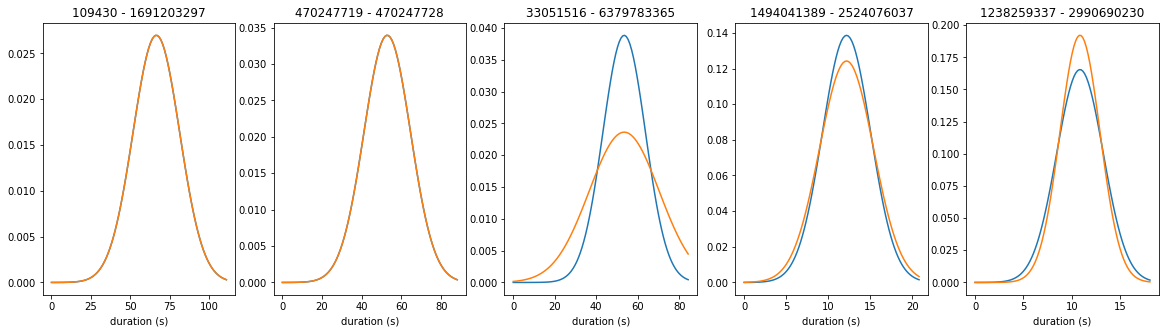

In [6]:
n_samples = 5
samples = np.random.choice(test_df.index, n_samples)
plt.figure(figsize=(20,5))
for i, sample in enumerate(samples):
    plt.subplot(1, n_samples, i+1)
    actual_avg = test_df.iloc[sample]['travel_time_avg']
    actual_std = test_df.iloc[sample]['travel_time_std']
    prediction_avg = test_df.iloc[sample]['predicted_travel_time_avg']
    prediction_std = test_df.iloc[sample]['predicted_travel_time_std']
    x = np.linspace(0, actual_avg + 3*actual_std, 100)
    plt.plot(x, stats.norm.pdf(x, actual_avg, actual_std), label='actual')
    plt.plot(x, stats.norm.pdf(x, prediction_avg, prediction_std), label='prediction')
    plt.xlabel('duration (s)')
    plt.title('{:.0f} - {:.0f}'.format(test_df.iloc[sample]['u_id'], test_df.iloc[sample]['v_id']))